In [2]:
import pandas as pd

hogares = pd.read_excel("usu_hogar_T324.xlsx")
personas = pd.read_excel("usu_individual_T324.xlsx")

In [3]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline  

### Tablas de Referencia

#### ESTADO - Condición de Actividad
Tipo de variable: Nominal

In [4]:
estado = pd.DataFrame([(0, "Encuesta no realizada"), (1, "Ocupado"), (2, "Desocupado"), (3, "Inactivo"), (4, "Menor de 10 años")], columns=["ESTADO", "ESTADO_NOMBRE"])

##### Datos faltantes
No hay registros con valores indefinidos.

In [5]:
sum(personas["ESTADO"].isna())

0

##### Análisis de Frecuencias

In [6]:
personas.merge(estado, how="inner", on="ESTADO")["ESTADO_NOMBRE"].value_counts()

Ocupado                  21031
Inactivo                 19519
Menor de 10 años          5601
Desocupado                1358
Encuesta no realizada       55
Name: ESTADO_NOMBRE, dtype: int64

In [7]:
personas.merge(estado, how="inner", on="ESTADO")["ESTADO_NOMBRE"].value_counts(normalize=True)

Ocupado                  0.442162
Inactivo                 0.410373
Menor de 10 años         0.117757
Desocupado               0.028551
Encuesta no realizada    0.001156
Name: ESTADO_NOMBRE, dtype: float64

([<matplotlib.patches.Wedge at 0x1a2ea6256f0>,
 [Text(0.25840791730478413, 1.406458441716002, 'Ocupado'),
  Text(-0.8596867743990301, -1.1427329740247245, 'Inactivo'),
  Text(1.214149102363229, -0.7554746569082023, 'Menor de 10 años'),
  Text(1.423283210129491, -0.13843736404414653, 'Desocupado'),
  Text(1.4299905637905503, -0.005194946581480005, 'Encuesta no realizada')],
 [Text(0.1879330307671157, 1.0228788667025468, '44.22%'),
  Text(-0.6252267450174763, -0.831078526563436, '41.04%'),
  Text(0.8830175289914393, -0.5494361141150561, '11.78%'),
  Text(1.035115061912357, -0.10068171930483383, '2.86%'),
  Text(1.0399931373022184, -0.0037781429683490944, '0.12%')])

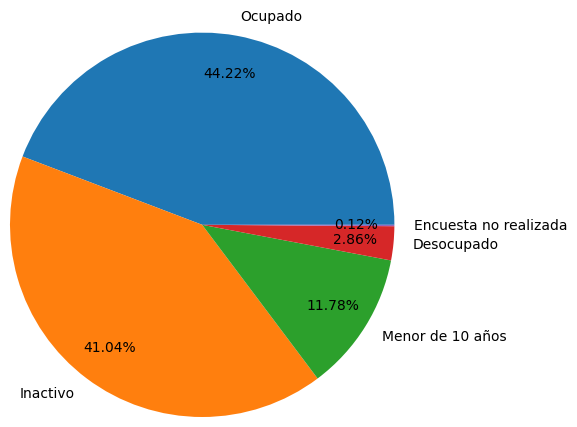

In [8]:
frecuencias = personas.merge(estado, how="inner", on="ESTADO")["ESTADO_NOMBRE"].value_counts()
plt.pie(frecuencias, labels=frecuencias.index, autopct="%.2f%%", pctdistance=0.8, labeldistance=1.1, radius=1.3)


### Análisis de ingresos

#### IPCF - Ingreso per Cápita Familiar

##### Datos Faltantes

No hay registros con datos faltantes

In [9]:
sum(personas["IPCF"].isna())

0

In [10]:

print("Media", np.round(np.mean(personas["IPCF"]),2))
print("Desvío estándar", np.round(np.std(personas["IPCF"]),2))
print("Media", np.round(np.mean(personas["IPCF"]),2))

Media 269332.6
Desvío estándar 348132.66
Media 269332.6


### Problemática:

¿Podemos encontrar relación entre los ingresos individuales con otras variables como nivel educativo, sexo, edad en la región Pampeana? ¿Se pueden establecer otras relaciones entre los comportamientos como comprar en cuotas o fiado u obtener préstamos?

### Variables:
Las variables a trabajar son:

| Nombre Tabla  | Descripción                |
|---------------|----------------------------|
| P47T          | Ingreso total ind. (mes)   |
| NIVEL_ED      | Nivel educativo alcanzado  |
| CH04          | Sexo                       |
| CH06          | Edad en años cumplidos     |
| V14           | Piden préstamos a personas |
| V15           | Piden préstamos a bancos   |
| V16           | Compran en cuotas o fiado  |


### Población total y muestra:
Este trabajo se basa en los datos provistos por la Encuesta Permanente de Hogares (EPH) correspondientes al tercer trimestre de 2024. Para este análisis se utilizaron tanto la base de datos de personas (individual) como la base de hogares, que fueron solapadas mediante el identificador común presente en ambas tablas (número de hogar y componente).
La población total a la que pertenecen estos datos es la población residente en la República Argentina, de acuerdo a la cobertura de la EPH. Esta población incluye tanto a personas económicamente activas como inactivas, y contempla diversos niveles educativos, edades y situaciones familiares.
Para el análisis se realizó un recorte geográfico, tomando únicamente los hogares y personas correspondientes a la región Pampeana, que abarca aglomerados urbanos en las provincias de Buenos Aires, Córdoba, Santa Fe, Entre Ríos y La Pampa.
La muestra analizada se compone de personas con ingresos individuales declarados, que además cuentan con información sobre sexo, edad, nivel educativo, y variables asociadas al comportamiento económico del hogar, como la compra en cuotas, al fiado, o el acceso a préstamos. Este enfoque permitió estudiar relaciones entre los ingresos individuales y diversas características sociodemográficas y de consumo dentro de la región Pampeana.

### Clasificar las variables elegidas.
| Variable                  | Tipo de variable       | Fuente (tabla)    |
|---------------------------|------------------------|-------------------|
| Ingreso individual        | Cuantitativa continua  | Base individual   |
| Edad                      | Cuantitativa continua  | Base individual   |
| Sexo                      | Cualitativa            | Base individual   |
| Nivel educativo           | Cualitativa ordinal    | Base individual   |
| Compra en cuotas          | Cualitativa            | Base de hogares   |
| Compra al fiado           | Cualitativa            | Base de hogares   |
| Préstamos solicitados     | Cualitativa            | Base de hogares   |

In [74]:
personas_fil_pam = personas[personas['REGION'] == 43]

In [75]:
print("Longitud Tabla Personas:", len(personas))
print("Longitud Tabla Personas Filtrada:", len(personas_fil_pam))


Longitud Tabla Personas: 47564
Longitud Tabla Personas Filtrada: 14315


Se redujo el total de la tabla personas un 30%

In [76]:
personas_fil = personas_fil_pam[['CH04', 'CH06', 'P47T', 'NIVEL_ED' ,'REGION', 'CODUSU' ]]
personas_fil.head()

,CH04,CH06,P47T,NIVEL_ED,REGION,CODUSU
0,2,33,-9.0,6,43,TQRMNOPTVHLOKRCDEFJAH00803557
1,1,33,-9.0,6,43,TQRMNOPTVHLOKRCDEFJAH00803557
2,1,81,1750000.0,6,43,TQRMNOQPRHKLKNCDEFJAH00868631
3,2,78,400000.0,6,43,TQRMNOQPRHKLKNCDEFJAH00868631
4,1,65,1200000.0,4,43,TQRMNORVXHKLKNCDEFJAH00868632


In [ ]:
personas_fil.isnull().sum()

CH04         0
CH06         0
P47T        15
NIVEL_ED     0
REGION       0
CODUSU       0
dtype: int64

Encontramos que en la columna de Ingresos hay 15 filas nulas

In [78]:
personas_fil.describe()

,CH04,CH06,P47T,NIVEL_ED,REGION
count,14315.000000,14315.000000,1.430000e+04,14315.000000,14315.0
mean,1.519246,37.251764,2.953922e+05,3.748795,43.0
std,0.499647,22.394482,4.934719e+05,1.774382,0.0
min,1.000000,-1.000000,-9.000000e+00,1.000000,43.0
25%,1.000000,18.000000,0.000000e+00,2.000000,43.0
50%,2.000000,35.000000,0.000000e+00,4.000000,43.0
75%,2.000000,55.000000,4.300000e+05,5.000000,43.0
max,2.000000,102.000000,1.237000e+07,7.000000,43.0


Hay un minimo de edad de -1 que no es lógico, y de ingresos -9. Y máximos en ingresos mensual marca como maximo $12.370.000 (puede ser correcto)

In [79]:
hogares_fil_pam = hogares[hogares['REGION'] == 43]
print("Longitud Tabla Hogares:", len(hogares))
print("Longitud Tabla Hogares Filtrada:", len(hogares_fil_pam))

Longitud Tabla Hogares: 16650
Longitud Tabla Hogares Filtrada: 5410


Se redujo el total de la tabla personas un 32%

In [80]:
hogares_fil = hogares_fil_pam[['V14', 'V15', 'V16','REGION', 'CODUSU' ]]

In [81]:
hogares_fil.head()

,V14,V15,V16,REGION,CODUSU
0,2,2,1,43,TQRMNOQVSHMMLOCDEFJAH00808791
1,2,2,1,43,TQRMNOPTQHKLLSCDEFJAH00866946
2,2,2,2,43,TQRMNORVTHMOLSCDEFJAH00808761
3,2,2,2,43,TQRMNORVVHMOLSCDEFJAH00866947
4,2,2,2,43,TQRMNOTPTHLNLRCDEFJAH00803474


In [82]:
hogares_fil.isnull().sum()


V14       0
V15       0
V16       0
REGION    0
CODUSU    0
dtype: int64

In [83]:
hogares_fil.describe()

,V14,V15,V16,REGION
count,5410.000000,5410.000000,5410.000000,5410.0
mean,1.851386,1.891682,1.529575,43.0
std,0.370006,0.327041,0.509435,0.0
min,1.000000,1.000000,1.000000,43.0
25%,2.000000,2.000000,1.000000,43.0
50%,2.000000,2.000000,2.000000,43.0
75%,2.000000,2.000000,2.000000,43.0
max,9.000000,9.000000,9.000000,43.0


Hay errores de ingreso de datos al tener maximos en "9" cuando permite 1 o 2, en cuanto a comportamientos de consumo-prestamos.

In [84]:
hogares_fil['V14'].value_counts()

2    4598
1     811
9       1
Name: V14, dtype: int64

Vemos una Fila con el valor 9 en la columna de prestamos a personas, por lo que se revisara cada estas variables

In [85]:
df_final = pd.merge(personas_fil, hogares_fil, on=['CODUSU'], how='inner')

In [86]:
df_final.isnull().sum()

CH04         0
CH06         0
P47T        15
NIVEL_ED     0
REGION_x     0
CODUSU       0
V14          0
V15          0
V16          0
REGION_y     0
dtype: int64

In [87]:
df_final.head(15)

,CH04,CH06,P47T,NIVEL_ED,REGION_x,CODUSU,V14,V15,V16,REGION_y
0,2,33,-9.0,6,43,TQRMNOPTVHLOKRCDEFJAH00803557,2,2,1,43
1,1,33,-9.0,6,43,TQRMNOPTVHLOKRCDEFJAH00803557,2,2,1,43
2,1,81,1750000.0,6,43,TQRMNOQPRHKLKNCDEFJAH00868631,2,2,2,43
3,2,78,400000.0,6,43,TQRMNOQPRHKLKNCDEFJAH00868631,2,2,2,43
4,1,65,1200000.0,4,43,TQRMNORVXHKLKNCDEFJAH00868632,2,1,1,43
5,2,66,435600.0,4,43,TQRMNORVXHKLKNCDEFJAH00868632,2,1,1,43
6,1,30,1125000.0,5,43,TQRMNORVXHKLKNCDEFJAH00868632,2,1,1,43
7,1,63,-9.0,3,43,TQRMNQYTSHMOKQCDEFJAH00851671,2,2,2,43
8,2,60,0.0,3,43,TQRMNQYTSHMOKQCDEFJAH00851671,2,2,2,43
9,2,22,0.0,4,43,TQRMNQYTSHMOKQCDEFJAH00851671,2,2,2,43


En este caso vamos a tener que agrupar las columnas de personas para resumirlas y trabajarlas junto con los datos de hogares.